##Trabajo Práctico n° 1

En este primer trabajo, el objetivo es cargar y modificar una imagen en Google Colab. En el proceso se conocerán algunos datos de la imagen para ver cómo cambian.

En este caso, se creó un directorio específico en Drive, pero puede cargarse una imagen en el directorio temporal de Colab, con la dificultad de que no podrá ejecutarse el último trozo de código para guardar la imagen modificada.

In [2]:
#Mounting 
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Image: 


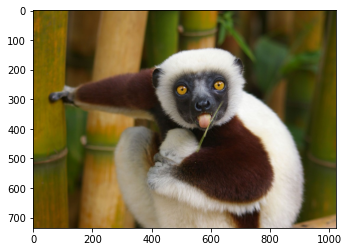

In [3]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

drive_dir = '/content/gdrive/My Drive/Doctorado/PDI/images/' #Directory

#UPLOADING IMAGE AS A NUMPY IMAGE
img = imageio.imread(drive_dir + 'lemur.jpg')
print("Image: ")
plt.imshow(img)
plt.show()

Size: (735, 1024, 3)
Channels:


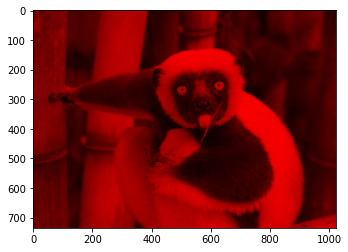

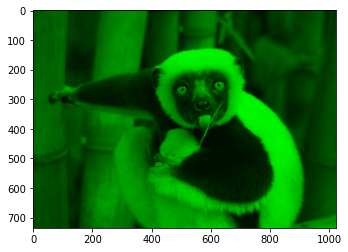

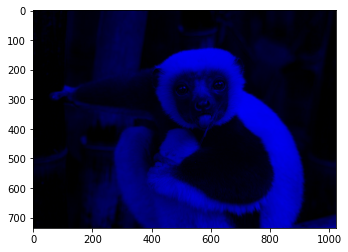

In [4]:
#ISIZE AND CHANNELS
img_dims = img.shape
R_channel = np.zeros(img_dims, dtype=np.uint8)
G_channel = np.zeros(img_dims, dtype=np.uint8)
B_channel = np.zeros(img_dims, dtype=np.uint8)
R_channel[:, :, 0] += img[:, :, 0]
G_channel[:, :, 1] += img[:, :, 1]
B_channel[:, :, 2] += img[:, :, 2]

print("Size: {}".format(img_dims))
print("Channels:")
plt.imshow(R_channel)
plt.show()
plt.imshow(G_channel)
plt.show()
plt.imshow(B_channel)
plt.show()

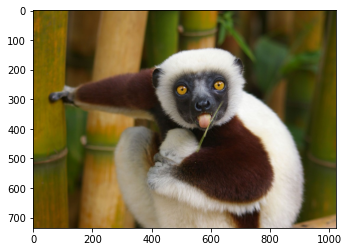

In [5]:
#REASsEMBLING IMAGE
new_img = R_channel + G_channel + B_channel
plt.imshow(new_img)
plt.show()

#Histograma
Como era de esperarse, hay mayor presencia del rojo y verde por sobre el azul, al tratarse de una imagen con fondo de vegetación y ligeramente amarillenta, debido a la luz ambiente. Esto puede interpretarse de los canales separados anteriormente, al notar la ausencia de color en la mayor parte del fondo.
Una segunda evidencia es el histograma realizado a continuación, donde se comprueba lo que hemos intuido.

Por otro lado, podemos notar que la frecuencia de los tonos está sesgada hacia la izquierda. Esto es, hay mayor frecuencia de tonos bajos que altos, detalle que podemos intuir también observando la imagen original. En ella, los colores están poco saturados y sólo una porción muy pequeña de la imagen contiene blanco, el "color" más claro que existe aquí, cuya composición corresponde a los tonos presentes a la derecha del histograma.

Histogram:


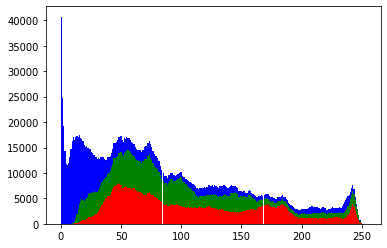

In [6]:
#IMAGE HISTOGRAM
print('Histogram:')
plt.hist(img.reshape(-1, 3), bins=256, color=['red', 'green', 'blue'], histtype='bar', stacked=True)
plt.show()

En el siguiente trozo de código, tomaremos el canal azul y lo dividimos por la mitad para ver qué efectos produce sobre la imagen.

Como puede apreciarse, la imagen pareciera haberse vuelto más amarillenta aún, como si el animal hubiese sido fotografiado un día de tormenta tropical.

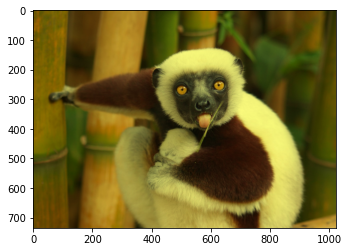

In [7]:
#MAKING SOME MODIFICATION TO THE BLUE CHANNEL
B_channel //= 2
halfblue_img = R_channel + G_channel + B_channel
plt.imshow(halfblue_img)
plt.show()

Nuevamente, el histograma muestra las consecuencias de esta modificación. Al observar el canal azul, vemos que casi ha desaparecido del lado derecho y se ha sesgado más aún hacia la izquierda, lo que hubiéramos esperado debido a que todo el canal azul fue reducido en una mitad entera su valor original. Varios píxeles perdieron su valor azul (evidenciado por un incremento en la frecuencia de pixeles con valor azul 0), mientras que los demás básicamente duplicaron la ocurrencia de valores azules en la mitad inferior de tal eje.


Histogram:


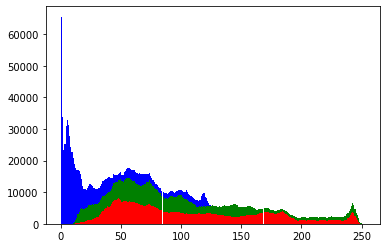

In [8]:
#HISTOGRAM OF HALF BLUE IMAGE
print('Histogram:')
plt.hist(halfblue_img.reshape(-1, 3), bins=256, color=['red', 'green', 'blue'], histtype='bar', stacked=True)
plt.show()

In [9]:
#SAVING NEW IMAGE
imageio.imwrite(drive_dir + 'halfblue_lemur.jpg', halfblue_img, 'jpg')